# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Открыте файла с данными и изучение общей информации

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
pd.set_option('display.max_columns', None)
data.head(10) # Ознакомление с данными

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


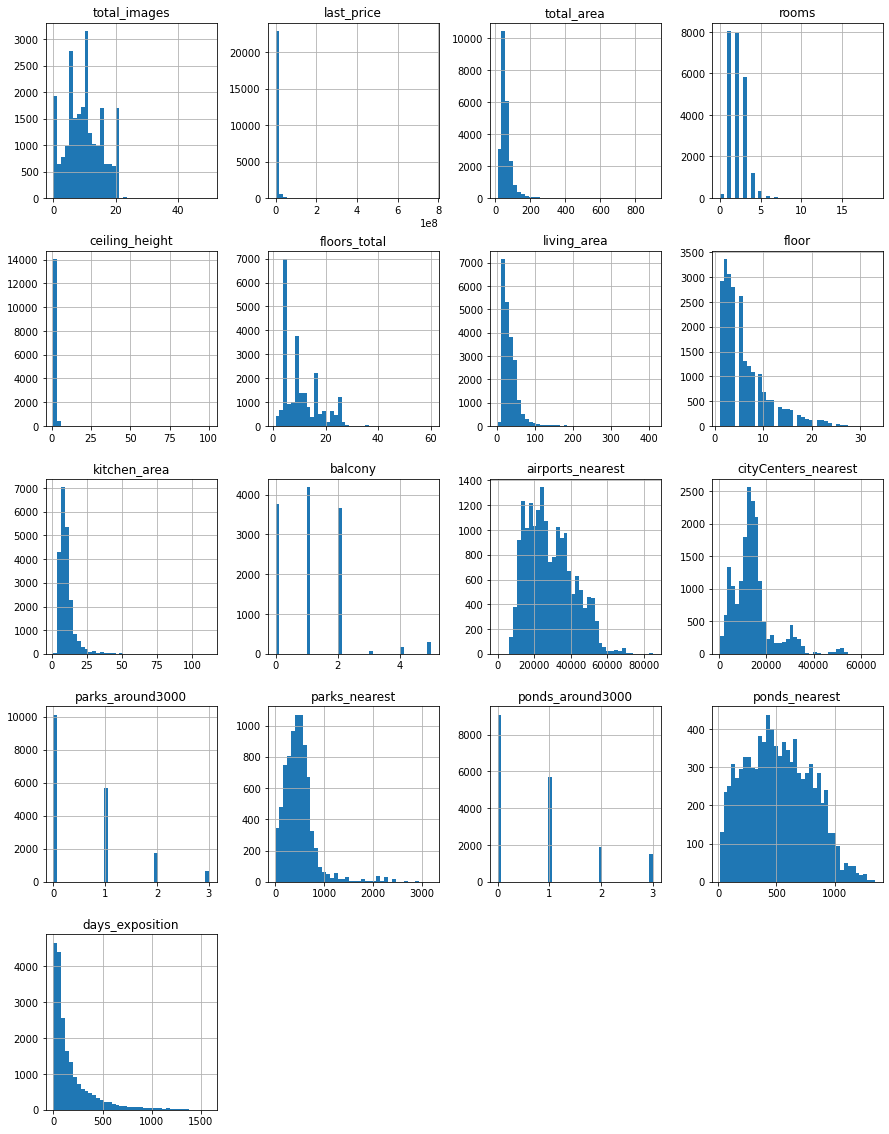

In [5]:
data.hist(bins = 40, figsize=(15, 20)); #построение гистограммы для всех числовых столбцов

### Предобработка данных

#### Поиск пропущенных значений

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Заполнение пропущенных значений

In [7]:
# Замена пропусков на 0 в столбце balcony, parks_around3000, ponds_around3000
data['balcony'].fillna(0, inplace = True)
data['parks_around3000'].fillna(0, inplace = True)
data['ponds_around3000'].fillna(0, inplace = True)

# Замена пропусков на False в столбце is_apartment
data['is_apartment'].fillna(False, inplace = True)

# Замена пропусков на медианное значение высоты потолков в столбце ceiling_height
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace = True)

# Замена пропусков в столбце living_area
# Рассчитаем медианное соотношение living_area к total_area для имеющихся данных
median_ratio_living = (data['living_area'] / data['total_area']).median()
# Используем медианное соотношение для заполнения пропусков в столбце living_area
data['living_area'].fillna(data['total_area'] * median_ratio_living, inplace=True)
data['living_area'] = data['living_area'].round(2)

# Замена пропусков в столбце kitchen_area
# Рассчитаем медианное соотношение kitchen_area к total_area для имеющихся данных
median_ratio_kitchen = (data['kitchen_area'] / data['total_area']).median()
# Используем медианное соотношение для заполнения пропусков в столбце living_area
data['kitchen_area'].fillna(data['total_area'] * median_ratio_kitchen, inplace=True)
data['kitchen_area'] = data['kitchen_area'].round(2)

# Замена пропусков на медианное значение всего этажей в доме в столбце floors_total
data['floors_total'].fillna(data['floors_total'].median(), inplace = True)

In [8]:
# Проверка заполнения пропущенных значений
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

##### Краткий вывод о причинах пропусков и методах их заполнения

1. **`ceiling_height` (высота потолков)** — 9195 пропусков:
   - **Причина:** Высота потолков — это не всегда обязательный параметр для пользователей, и часто её не указывают в объявлениях. Особенно в типовых домах, где высота потолков может считаться стандартной и не уточняется.
   - **Метод:** Пропуски заменены медианным значением, так как это стандартное значение, которое не искажает распределение данных.  
2. **`floors_total` (всего этажей в доме)** — 86 пропусков:
   - **Причина:** Пропуски могли возникнуть из-за неаккуратного ввода данных пользователями.
   - **Метод:** Использование медианного значения, так как это оптимальный способ заполнения числовых данных при их относительно равномерном распределении.    
3. **`living_area` (жилая площадь)** — 1903 пропуска:
   - **Причина:** Пользователи могли не указать жилую площадь, особенно если они не знали её точного значения. Это часто встречается, когда площадь разных комнат неизвестна или нет детальной планировки.
   - **Метод:** Пропуски заполнены на основе медианного соотношения между общей и жилой площадями, что позволяет учесть размер каждой квартиры при заполнении данных.
4. **`is_apartment` (апартаменты)** — 20924 пропуска:
   - **Причина:** Большинство квартир не являются апартаментами, и пользователи просто не указывают эту характеристику, полагая её неважной для стандартного жилья.
   - **Метод:** Пропуски заменены на `False`, так как апартаменты — это особая категория недвижимости, а отсутствие информации скорее всего указывает на стандартные квартиры.
5. **`kitchen_area` (площадь кухни)** — 2278 пропусков:
   - **Причина:** Как и в случае с жилой площадью, пользователи могли не знать точную площадь кухни или посчитали её незначительной для объявления. Это особенно характерно для старых объектов, где планировка плохо документирована.
   - **Метод:** Пропуски заполнены на основе медианного соотношения с общей площадью, что помогает сохранить соразмерность площади кухни по отношению к общей площади квартиры.
6. **`balcony` (число балконов)** — 11519 пропусков:
   - **Причина:** В объявлениях часто не указывают число балконов, особенно если их нет, поскольку это может считаться несущественной информацией для продажи.
   - **Метод:** Пропуски заменены на `0`, так как отсутствие информации о балконе вероятнее всего означает, что балконов нет.
7. **`locality_name` (название населённого пункта)** — 49 пропусков:
   - **Причина:** Пропуски могли возникнуть из-за ошибок при автоматической подгрузке данных о местоположении. Например, если геолокационные данные не были корректно распознаны системой.
   - **Метод:** Пропуски оставлены, так как их корректное восстановление затруднительно без точных данных о местоположении.
8. **`airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest` (геоданные)** — тысячи пропусков:
   - **Причина:** Эти данные подгружаются автоматически на основе геолокации, и если объект (например, аэропорт, центр города, парк или водоём) не был найден в радиусе или геолокация не была определена точно, возникают пропуски.
   - **Метод:** Пропуски оставлены, так как их корректное заполнение невозможно, а замена на `0` исказит данные, подразумевая, что объекты находятся непосредственно рядом с недвижимостью.
9. **`days_exposition` (время размещения объявления)** — 3181 пропуск:
   - **Причина:** Пропуски могут быть связаны с техническими ошибками при снятии объявления с публикации или с отсутствием полной информации о времени размещения.
   - **Метод:** Пропуски оставлены, так как точное восстановление этих данных затруднительно, и их отсутствие может само по себе быть важной информацией.


#### Преобразования типа данных

In [9]:
# Ознакомление с типыми данных
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [10]:
# Преобразование данных в столбце first_day_exposition из object в datetime
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S'
)

data['rooms'] = data['rooms'].astype('int')

# Пройдемся по всем столбцам с типом float
for column in data.select_dtypes(include='float'):
    # Проверим, все ли значения в столбце можно преобразовать в целые (дробная часть равна 0)
    if (data[column] % 1 == 0).all():
        # Преобразуем столбец в int
        data[column] = data[column].astype(int)

In [11]:
# Проверка установления корректных типов данных
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000                 int64
parks_nearest                  float64
ponds_around3000                 int64
ponds_nearest                  float64
days_exposition                float64
dtype: object

##### Краткий вывод о причинах изменения типов данных

1. **first_day_exposition** — преобразован из `object` в `datetime`:
   - **Причина:** Столбец содержал строки с датами, что усложняло их обработку. Преобразование в формат `datetime` позволяет работать с датами напрямую.

2. **last_price** — преобразован из `float64` в `int64`:
   - **Причина:** Цены на недвижимость всегда представлены целыми числами, а хранение их в формате с плавающей запятой (`float64`) было излишним.

3. **floors_total** — преобразован из `float64` в `int64`:
   - **Причина:** Количество этажей в доме всегда является целым числом, поэтому хранение этого параметра в формате с плавающей запятой не имело смысла.

4. **balcony** — преобразован из `float64` в `int64`:
   - **Причина:** Количество балконов также всегда целое число. 

5. **parks_around3000 и ponds_around3000** — преобразованы из `float64` в `int64`:
   - **Причина:** Количество парков и водоёмов в радиусе 3 км всегда выражается в целых числах. 

6. **days_exposition, airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest** — остались в формате `float64`:
   - **Причина:** Эти столбцы содержат геоданные или временные интервалы, которые могут иметь значения с дробной частью.

7. **studio, is_apartment, open_plan** — остались в формате `bool`:
   - **Причина:** Эти столбцы логические (булевы), так как описывают наличие или отсутствие определённых характеристик квартиры.

8. **total_area, living_area, kitchen_area, ceiling_height** — остались в формате `float64`:
   - **Причина:** Эти столбцы содержат данные о площадях или высоте потолков, которые могут иметь дробные значения.


#### Устранение неявных дубликатов в  столбце с названиями

In [12]:
# Просмотр уникальных значений в столбце названий
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [13]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'поселок', 
              'городской п.'], 'п.', regex=True)
    .replace(['деревня'], 'д.', regex=True)
    .replace(['село'], 'с.', regex=True)
    .replace(['садовое товарищество', 'садоводческое некоммерческое товарищество'], 'сад.', regex=True)
    .replace(['п. Федоровское'], 'д. Федоровское')
    .replace(['п. Павлово'], 'с. Павлово')
    .replace(['сад. Рахья'], 'п. Рахья')
    .replace(['п. станции Громово'], 'п. Громово')
    .replace(['п. станции Приветнинское', 'п. при железнодорожной станции Приветнинское'], 'п. Приветнинское', regex=True)
    .replace('Мурино', 'п. Мурино')
    .replace('Кудрово', 'д. Кудрово')

)

In [14]:
# Проверка устранения неявных дубликатов
data['locality_name'].unique()

array(['Санкт-Петербург', 'п. Шушары', 'п. Янино-1', 'п. Парголово',
       'п. Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'д. Кудрово', 'Коммунар', 'Колпино', 'п. Красный Бор', 'Гатчина',
       'д. Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'д. Новое Девяткино', 'п. Металлострой', 'п. Лебяжье',
       'п. Сиверский', 'п. Молодцово', 'п. Кузьмоловский',
       'сад. Новая Ропша', 'Павловск', 'д. Пикколово', 'Всеволожск',
       'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк', 'д. Куттузи',
       'п. Аннино', 'п. Ефимовский', 'п. Плодовое', 'д. Заклинье',
       'п. Торковичи', 'п. Первомайское', 'Красное Село', 'п. Понтонный',
       'Сясьстрой', 'д. Старая', 'д. Лесколово', 'п. Новый Свет',
       'Сланцы', 'с. Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'д. Оржицы', 'д. Кальтино',
       'п. Романовка', 'п. Бугры', 'п. Рощино', 'Кириши', 'Луга',
       'Волосово', 'Отрадное', 'с. Павлово', 'п. Оредеж'

##### Краткий вывод об устранении неявных дубликатов
Были обработаны неявные дубликаты в названиях населенных пунктов, приведя их к единому типу: сокращены обозначения населенных пунктов до единого вида, таких как "п." (посёлок), "д." (деревня), "с." (село), "сад." (садовое товарищество). Сокращения населенных пунктов были сохранены, поскольку категории населенных пунктов могут быть полезны для дальнейшего анализа, чтобы учитывать различия между типами населенных пунктов.

### Добавление новых столбцов в таблицу

In [15]:
# Создаем столбец с ценой за один квадратный метр
data['sqm_cost'] = (data['last_price'] / data['total_area']).round(2)

# Создаем столбец с данными о дне недели, месяце и годе публикации объявления
data['day_exp'] = data['first_day_exposition'].dt.weekday
data['mounth_exp'] = data['first_day_exposition'].dt.month
data['year_exp'] = data['first_day_exposition'].dt.year

# Создаем столбец с типом этажа квартиры
def floor_type_group(row):
    floor = row['floor']
    last_floor = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == last_floor:
        return 'последний'
    return 'другой'
data['floor_type'] = data.apply(floor_type_group, axis = 1)

# Создаем столбец с расстоянием до центра в км
data['centers_nearest_km'] = (data['cityCenters_nearest'] / 1000).round(0)

# Вывод таблица для проверки результатов
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_cost,day_exp,mounth_exp,year_exp,floor_type,centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,п. Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.29,9,False,False,False,27.41,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0


#### Краткий вывод
Были созданы новые столбцы для дальнейшего анализа: `sqm_cost` (цена за квадратный метр), `day_exp` (день недели), `mounth_exp` (месяц), `year_exp` (год публикации объявления), `floor_type` (тип этажа: первый, последний, другой), а также `centers_nearest_km` (расстояние до центра города в километрах). Эти преобразования помогут в более детальном анализе и исследовании факторов, влияющих на стоимость недвижимости.

### Исследовательский анализ данных

Оставим исходные данные в переменной `data` и создим отдельную копию для обработки `good_data`.

In [16]:
# Создание копии данных для обработки
good_data = data.copy()

#### Исследование параметров

##### Исследование общей площади жилых объектов

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

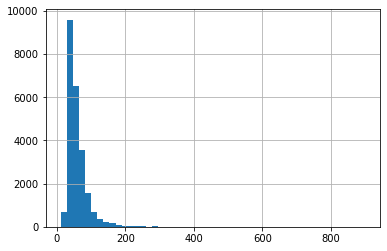

In [17]:
# Построение диаграммы с распределением общей площади жилых объектов
good_data['total_area'].hist(bins = 50)
# Числовое описание данных
good_data['total_area'].describe()      

In [18]:
# Отсекаем данные
upper_limit = 200
good_data = good_data[good_data['total_area'] < upper_limit]

Построено распределение общей площади объектов. Числовое описание показало, что медианная площадь — 52 кв.м, но есть выбросы до 900 кв.м. Для устранения выбросов установлен верхний порог в 200 кв.м.

In [19]:
len(good_data)

23468

##### Исследование жилой площади жилых объектов

count    23468.000000
mean        33.277595
std         17.256434
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

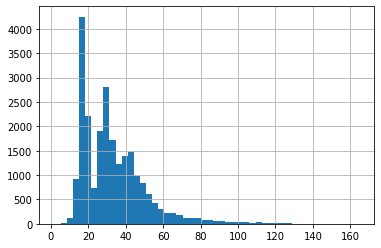

In [20]:
# Построение диаграммы с распределением общей площади жилых объектов
good_data['living_area'].hist(bins = 50)
# Числовое описание данных
good_data['living_area'].describe()  

<AxesSubplot:>

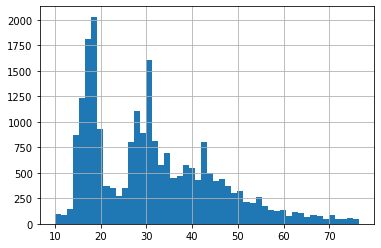

In [21]:
# Определение верхней границы IQR
iqr = good_data['living_area'].quantile(0.75) - good_data['living_area'].quantile(0.25)
up_lim_living = good_data['living_area'].quantile(0.75) + 1.5 * iqr

# Фильтрация данных по границам IQR
good_data = good_data[(good_data['living_area'] >= 10) & (good_data['living_area'] <= up_lim_living)]

# Проверка фильтрации данных
good_data['living_area'].hist(bins = 50)

Было исследовано распределение жилой площади жилых объектов. Диаграмма и числовые данные показали, что минимальные значения начинаются с 2 м², а максимальные достигают 164.7 м². Для исключения выбросов была применена фильтрация данных по методу межквартильного размаха (IQR). Установлены границы для фильтрации: минимальная жилая площадь — 10 м², максимальная — на уровне 1.5 IQR от верхнего квартиля. Данные, выходящие за эти границы, были удалены.

In [22]:
len(good_data)

22774

##### Исследование площади кухни жилых объектов

count    22774.000000
mean        10.019394
std          4.976447
min          1.300000
25%          7.000000
50%          9.000000
75%         11.400000
max         93.200000
Name: kitchen_area, dtype: float64

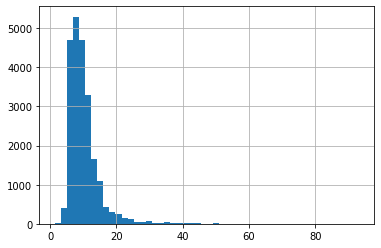

In [23]:
# Построение диаграммы с распределением площади кухни жилых объектов
good_data['kitchen_area'].hist(bins = 50)
# Числовое описание данных
good_data['kitchen_area'].describe()

<AxesSubplot:>

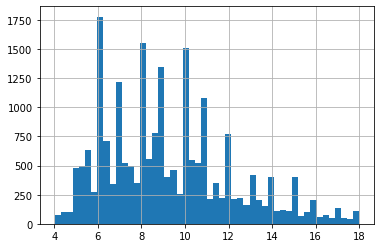

In [24]:
# Определение верхней границы IQR
iqr = good_data['kitchen_area'].quantile(0.75) - good_data['kitchen_area'].quantile(0.25)
up_lim_kitchen = good_data['kitchen_area'].quantile(0.75) + 1.5 * iqr

# Фильтрация данных по границам IQR
good_data = good_data[(good_data['kitchen_area'] <= up_lim_kitchen) & (good_data['kitchen_area'] > 4)]

# Проверка фильтрации данных
good_data['kitchen_area'].hist(bins = 50)

В ходе исследования площади кухни применена фильтрация по методу IQR. Были удалены данные, где площадь превышает верхнюю границу (выше 1.5 IQR), а также исключены объекты с кухнями менее 4 м². Повторная гистограмма показала обновленное распределение после фильтрации.

In [25]:
len(good_data)

21556

##### Исследование цен жилых объектов

count    2.155600e+04
mean     5.165873e+06
std      3.173720e+06
min      4.300000e+05
25%      3.350000e+06
50%      4.450000e+06
75%      6.100000e+06
max      5.300000e+07
Name: last_price, dtype: float64

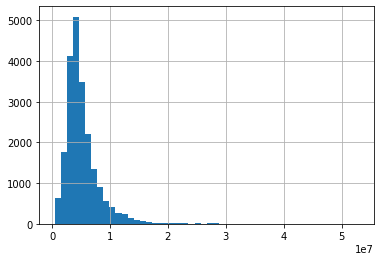

In [26]:
# Построение диаграммы с распределением цен на жилые объекты
good_data['last_price'].hist(bins = 50)
# Числовое описание данных
good_data['last_price'].describe()

<AxesSubplot:>

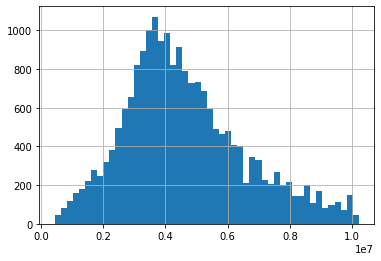

In [27]:
# Определение верхней границы IQR
iqr = good_data['last_price'].quantile(0.75) - good_data['last_price'].quantile(0.25)
up_lim_price = good_data['last_price'].quantile(0.75) + 1.5 * iqr

# Фильтрация данных по границам IQR
good_data = good_data[good_data['last_price'] <= up_lim_price]

# Проверка фильтрации данных
good_data['last_price'].hist(bins = 50)

Было проведено исследование цен на жилые объекты. Сначала построена гистограмма для оценки распределения цен, после чего выполнена фильтрация данных по верхней границе IQR для устранения выбросов. Повторная гистограмма показала обновленное распределение после фильтрации.

In [28]:
len(good_data)

20306

##### Исследование количество комнат жилых объектов

1    7756
2    7171
3    4532
4     622
0     166
5      56
6       3
Name: rooms, dtype: int64

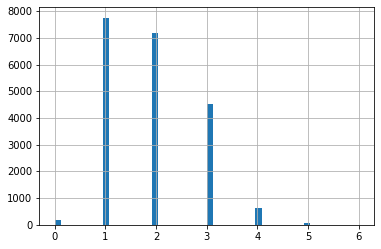

In [29]:
# Построение диаграммы с распределением комнат жилых объектов
good_data['rooms'].hist(bins = 50)
# Числовое описание данных
good_data['rooms'].value_counts()

<AxesSubplot:>

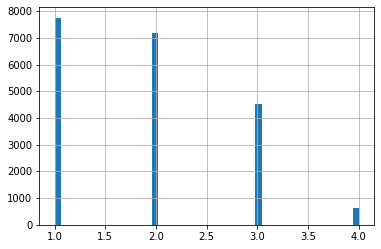

In [30]:
# Фильтрация данных
good_data = good_data[(good_data['rooms'] >= 1) & (good_data['rooms'] <= 4)]

# Проверка фильтрации данных
good_data['rooms'].hist(bins = 50)

Было исследовано распределение количества комнат в жилых объектах. Выявлено, что большая часть объектов — это одно-, двух- и трехкомнатные квартиры. В ходе фильтрации были удалены аномальные значения (объекты с 0 или более 4 комнат).

In [31]:
len(good_data)

20081

##### Исследование высоты потолков жилых объектов

count    20081.000000
mean         2.689510
std          0.790356
min          1.000000
25%          2.590000
50%          2.650000
75%          2.650000
max         32.000000
Name: ceiling_height, dtype: float64

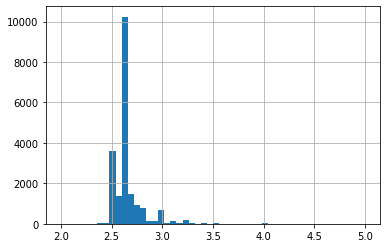

In [32]:
# Построение диаграммы с распределением высоты потолков
good_data['ceiling_height'].hist(bins = 50, range=(2,5))
# Числовое описание данных
good_data['ceiling_height'].describe()

<AxesSubplot:>

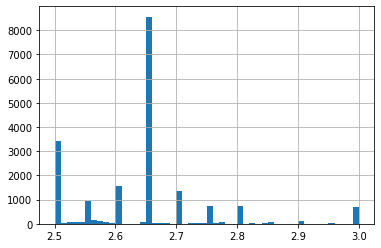

In [33]:
# Исправление явно некорректных значений в столбце ceiling_height
good_data['ceiling_height'] = good_data['ceiling_height'].replace({25: 2.5, 32: 3.2})
# Фильтрация данных
good_data = good_data[(good_data['ceiling_height'] <= 3.0) & (good_data['ceiling_height'] >= 2.5)]
# Проверка фильтрации данных
good_data['ceiling_height'].hist(bins = 50)

Для фильтрации высоты потолков были выбраны границы от 2.5 до 3.0 метров, поскольку это стандартные значения для жилых объектов. Хотя можно было использовать верхнюю границу, рассчитанную по IQR (которая составила 2.45), этот подход привел бы к потере значительного объема данных, поэтому было решено установить более реалистичные границы, чтобы сохранить больше данных для анализа.

In [34]:
len(good_data)

19306

##### Исследование типа этажей жилых объектов

другой       14166
последний     2628
первый        2512
Name: floor_type, dtype: int64

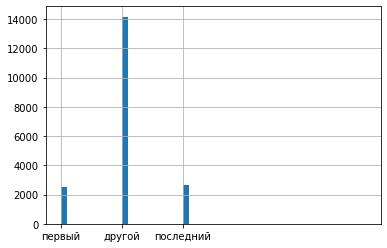

In [35]:
# Построение диаграммы с распределением типа этажей
good_data['floor_type'].hist(bins = 50, range=(0,5))
# Числовое описание данных
good_data['floor_type'].value_counts()

Распределение данных по типам этажей показывает корректные результаты, фильтрация не требуется.

##### Исследование общего количества этажей в жилых объектах

count    19306.000000
mean        10.828188
std          6.563890
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

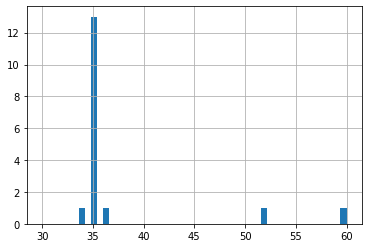

In [36]:
# Построение диаграммы с распределением количество этажей
good_data['floors_total'].hist(bins = 50, range=(30,60))
# Числовое описание данных
good_data['floors_total'].describe()

<AxesSubplot:>

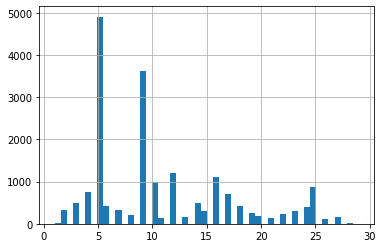

In [37]:
# Определение границ IQR
iqr = good_data['floors_total'].quantile(0.75) - good_data['floors_total'].quantile(0.25)
up_lim_floors = good_data['floors_total'].quantile(0.75) + 1.5 * iqr

# Фильтрация данных по границам IQR
good_data = good_data[good_data['floors_total'] <= up_lim_floors]

# Проверка фильтрации данных
good_data['floors_total'].hist(bins = 50)

Диаграмма распределения количества этажей объектов показывает типичную картину для многоквартирных домов: наибольшая часть объектов имеет от 5 до 14 этажей. После определения верхних и нижних границ методом IQR были удалены выбросы, такие как объекты с аномально малым (1) или чрезмерно большим количеством этажей (более 30).

In [38]:
len(good_data)

19289

##### Исследование расстояния до центра города в метрах от жилых объектах

count    14165.000000
mean     15608.572820
std       8357.336384
min        399.000000
25%      11250.000000
50%      14022.000000
75%      16929.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

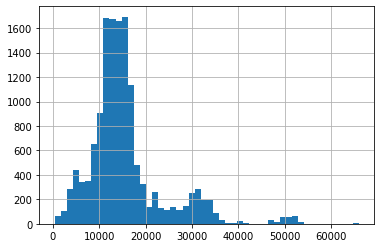

In [39]:
# Построение диаграммы с распределением расстояния до центра
good_data['cityCenters_nearest'].hist(bins = 50)
# Числовое описание данных
good_data['cityCenters_nearest'].describe()

<AxesSubplot:>

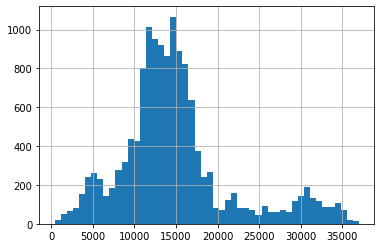

In [40]:
# Фильтрация данных, с сохранением строк с пропусками (NaN) 
good_data = good_data[(good_data['cityCenters_nearest'] <= 37000) | (good_data['cityCenters_nearest'].isnull())]

# Проверка фильтрации данных
good_data['cityCenters_nearest'].hist(bins = 50)

В ходе анализа распределения расстояния до центра города было обнаружено несколько выбросов. Для их устранения рассчитали границы на основе IQR, и данные за пределами 37 км были исключены. Это помогло сгладить распределение, убрав аномально удаленные объекты.

In [41]:
len(good_data)

19005

##### Исследование расстояния до ближайшего парка от жилых объектах                     

count    5497.000000
mean      494.735856
std       326.675553
min         1.000000
25%       301.000000
50%       460.000000
75%       619.000000
max      3190.000000
Name: parks_nearest, dtype: float64

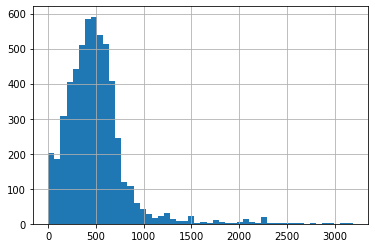

In [42]:
# Построение диаграммы с распределением расстояния до парка
good_data['parks_nearest'].hist(bins = 50)
# Числовое описание данных
good_data['parks_nearest'].describe()

<AxesSubplot:>

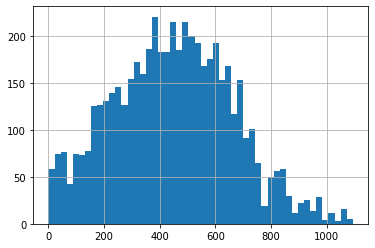

In [43]:
# Определение верхней границы IQR
iqr = good_data['parks_nearest'].quantile(0.75) - good_data['parks_nearest'].quantile(0.25)
up_lim_parks = good_data['parks_nearest'].quantile(0.75) + 1.5 * iqr
# Фильтрация данных по границам IQR с сохранением строк с пропусками (NaN)
good_data = good_data[(good_data['parks_nearest'] <= up_lim_parks) | (good_data['parks_nearest'].isnull())]
# Проверка фильтрации данных
good_data['parks_nearest'].hist(bins = 50)


Была выполнена фильтрация данных по границам IQR: значения, превышающие верхнюю границу, удалены. Пропуски (NaN) сохранены, чтобы избежать потери данных с отсутствующей информацией.

In [44]:
len(good_data)

18794

##### Проверка количества отсеянных данных

In [45]:
len(data) - len(good_data)

4905

После проведения фильтрации данных по различным параметрам, общее количество удаленных строк составило 4905. Это связано с тем, что были устранены выбросы и некорректные значения, выявленные в ходе анализа параметров, таких как расстояние до центра, площадь квартир, количество этажей и другие. Пропуски в данных, где это было уместно, были сохранены, чтобы избежать излишней потери информации. Также в каждом пункте была вызвана функция `len(good_data)` для отслеживания количества отфильтрованных строк.

#### Исследование скорости продажи жилых объектов

count    16614.000000
mean       168.087336
std        205.286842
min          1.000000
25%         43.000000
50%         89.000000
75%        213.000000
max       1580.000000
Name: days_exposition, dtype: float64

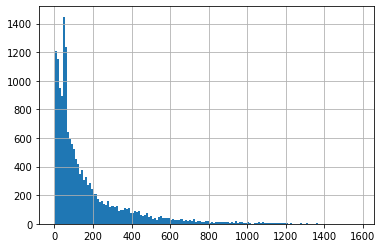

In [46]:
# Построение диаграммы с распределением расстояния до центра
good_data['days_exposition'].hist(bins = 150)
# Числовое описание данных
good_data['days_exposition'].describe()

**Вывод**

Среднее время продажи квартир составляет 168 дней, однако данные сильно варьируются, что видно из стандартного отклонения в 205 дней. Медианное значение — 89 дней, что говорит о том, что половина всех квартир продается быстрее этого срока. Быстрыми можно считать продажи, которые завершились в пределах 43 дней (1-й квартиль), а необычно долгими — продажи, которые заняли более 213 дней (3-й квартиль).

#### Факторы, влияющие на стоимость объекта.

##### Зависимость стоимости от общей площади жилого объекта

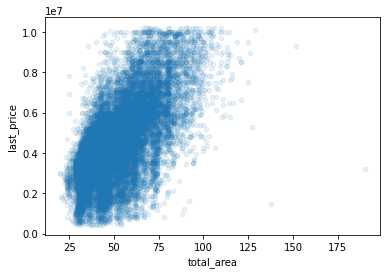

In [47]:
# Построение диаграммы рассеяния зависимости цены от общей площади
good_data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1)
plt.show()

In [48]:
# Рассчёт корреляции
correlation_total_area = good_data['last_price'].corr(data['total_area'])
f'Коэффициент корреляции: {correlation_total_area}'

'Коэффициент корреляции: 0.6406192242775391'

**Вывод**

Исследована зависимость стоимости от общей площади через диаграмму рассеяния с прозрачностью точек (alpha=0.1) и рассчитан коэффициент корреляции. Выявлена заметная положительная связь: чем больше общая площадь, тем выше цена. Коэффициент корреляции составил 0.64.

##### Зависимость стоимости от жилой площади жилого объекта

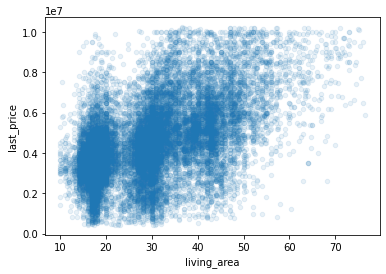

In [49]:
# Построение диаграммы рассеяния зависимости цены от жилой площади
good_data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.1)
plt.show()

In [50]:
# Рассчёт корреляции
correlation_living_area = good_data['living_area'].corr(data['last_price'])
f'Коэффициент корреляции: {correlation_living_area}'

'Коэффициент корреляции: 0.5289820657291849'

**Вывод**

Исследована зависимость стоимости от жилой площади через диаграмму рассеяния с прозрачностью точек (alpha=0.1) и рассчитан коэффициент корреляции. Выявлена заметная положительная связь: чем больше жилая площадь, тем выше цена. Коэффициент корреляции составил 0.53.

##### Зависимость стоимости от площади кухни жилого объекта

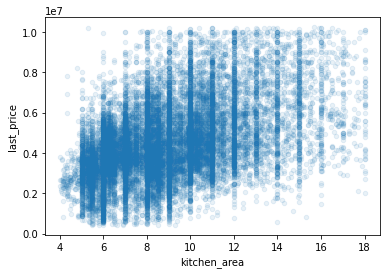

In [51]:
good_data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.1)
plt.show()

In [52]:
# Рассчёт корреляции
correlation_kitchen_area = good_data['kitchen_area'].corr(data['last_price'])
f'Коэффициент корреляции: {correlation_kitchen_area}'

'Коэффициент корреляции: 0.46120344484556763'

**Вывод**

Исследована зависимость стоимости от площади кухни через диаграмму рассеяния с прозрачностью точек (alpha=0.1) и рассчитан коэффициент корреляции. Выявлена умеренная положительная связь: чем больше жилая площадь, тем выше цена. Коэффициент корреляции составил 0.46.

##### Зависимость стоимости от количества комнат в жилом объекте

In [53]:
# Создание сводной таблицы, которая показывает среднюю цену для каждой категории количества комнат
pivot_rooms = good_data.pivot_table(index='rooms', values='last_price', aggfunc='mean')
# Вывод сводной таблицы для проверки
pivot_rooms

,last_price
rooms,
1,3.692193e+06
2,4.715127e+06
3,5.557274e+06
4,6.063044e+06


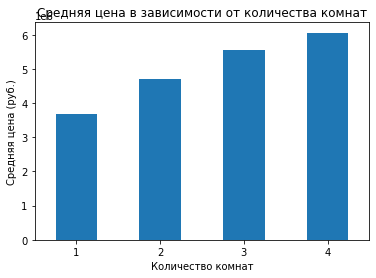

In [54]:
# Построение графика зависимости цены от количества комнат
pivot_rooms.plot(kind='bar', legend=False,
                       title= 'Средняя цена в зависимости от количества комнат',
                       xlabel='Количество комнат',
                       ylabel='Средняя цена (руб.)',
                       rot=0
                      )
plt.show()


In [55]:
# Рассчёт корреляции
correlation_rooms = good_data['last_price'].corr(data['rooms'])
f'Коэффициент корреляции: {correlation_rooms}'

'Коэффициент корреляции: 0.4041712155385913'

**Вывод**

Исследована зависимость стоимости от количества комнат с помощью столбчатой диаграммы и коэффициента корреляции. Установлена умеренная положительная зависимость: с увеличением количества комнат цена квартиры возрастает, но эта связь выражена незначительно. Коэффициент корреляции равен 0.40.

##### Зависимость стоимости от этажа, на котором расположен жилой объект

In [56]:
# Создание сводной таблицы, которая показывает среднюю цену для каждой категории этажа
pivot_floor_type = good_data.pivot_table(index='floor_type', values='last_price', aggfunc='mean')
# Сортировка цен по возростанию
pivot_floor_type = pivot_floor_type.sort_values(by='last_price', ascending=True)
# Вывод сводной таблицы для проверки
pivot_floor_type

,last_price
floor_type,
первый,3.917214e+06
последний,4.054064e+06
другой,4.735668e+06


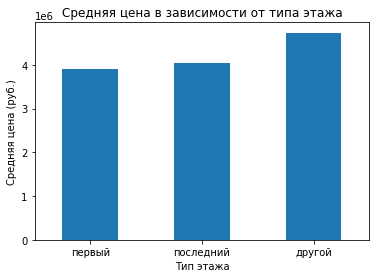

In [57]:
# Построение графика зависимости цены от типа этажа
pivot_floor_type.plot(kind='bar', legend=False,
                       title= 'Средняя цена в зависимости от типа этажа',
                       xlabel='Тип этажа',
                       ylabel='Средняя цена (руб.)',
                       rot=0
                      )
plt.show()

**Вывод**

Для исследования зависимости стоимости квартиры от типа этажа был построен график и рассчитаны средние цены для категорий: первый этаж, последний этаж, и другие этажи. На основе сводной таблицы видно, что квартиры на первом этаже в среднем дешевле, чем на последних и других этажах.

##### Зависимость стоимости от даты размещения объявления

**Найдем зависимость стоимости от года размещения объявления**

In [58]:
# Создание сводной таблицы, которая показывает среднюю цену по годам
pivot_year_exp = good_data.pivot_table(index='year_exp', values='last_price', aggfunc='mean')

# Вывод сводной таблицы для проверки
pivot_year_exp

,last_price
year_exp,
2014,4.803505e+06
2015,4.797896e+06
2016,4.477142e+06
2017,4.479426e+06
2018,4.483716e+06
2019,4.817183e+06


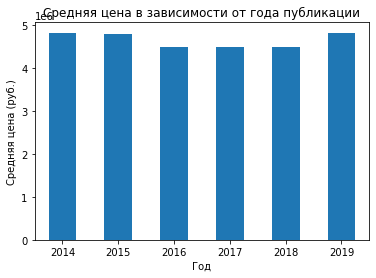

In [59]:
# Построение графика зависимости цены от типа этажа
pivot_year_exp.plot(kind='bar', legend=False,
                       title= 'Средняя цена в зависимости от года публикации',
                       xlabel='Год',
                       ylabel='Средняя цена (руб.)',
                       rot=0
                      )
plt.show()

**Найдем зависимость стоимости от месяца размещения объявления**

In [60]:
# Создание сводной таблицы, которая показывает среднюю цену по месяцам
pivot_mounth_exp = good_data.pivot_table(index='mounth_exp', values='last_price', aggfunc='mean')

# Вывод сводной таблицы для проверки
pivot_mounth_exp

,last_price
mounth_exp,
1,4.560933e+06
2,4.532933e+06
3,4.518525e+06
4,4.669716e+06
5,4.531553e+06
6,4.354679e+06
7,4.507037e+06
8,4.543536e+06
9,4.555208e+06


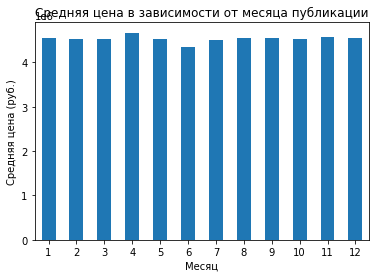

In [61]:
# Построение графика зависимости цены от месяца публикации
pivot_mounth_exp.plot(kind='bar', legend=False,
                       title= 'Средняя цена в зависимости от месяца публикации',
                       xlabel='Месяц',
                       ylabel='Средняя цена (руб.)',
                       rot=0
                      )
plt.show()

**Найдем зависимость стоимости от дня размещения объявления**

In [62]:
# Создание сводной таблицы, которая показывает среднюю цену по дня
pivot_day_exp = good_data.pivot_table(index='day_exp', values='last_price', aggfunc='mean')

# Вывод сводной таблицы для проверки
pivot_day_exp

,last_price
day_exp,
0,4.566273e+06
1,4.544538e+06
2,4.585204e+06
3,4.512700e+06
4,4.518489e+06
5,4.493072e+06
6,4.504422e+06


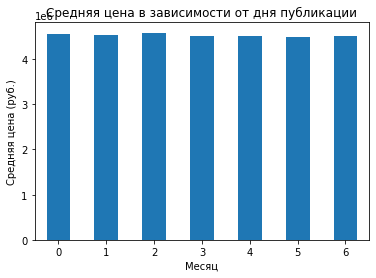

In [63]:
# Построение графика зависимости цены от месяца публикации
pivot_day_exp.plot(kind='bar', legend=False,
                       title= 'Средняя цена в зависимости от дня публикации',
                       xlabel='Месяц',
                       ylabel='Средняя цена (руб.)',
                       rot=0
                      )
plt.show()

**Вывод по анализу цен на жилые объекты от даты публикации объявления**

Из проведенного анализа видно, что зависимость стоимости от даты размещения объявления по годам, месяцам и дням недели не является значительной. Коэффициенты корреляции для всех трёх параметров очень низкие, около 0.01, что указывает на практически полное отсутствие связи между датой публикации и ценой. Средние значения цен по годам, месяцам и дням публикуются с незначительными колебаниями, что может свидетельствовать о стабильности цен независимо от времени размещения объявления.

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [64]:
# Создание сводной таблицы с количеством объявлений и средней ценой за квадратный метр
locality_pivot = (good_data
                  .pivot_table(index='locality_name', 
                               values='sqm_cost', 
                               aggfunc=['count', 'mean'])
                  .reset_index())

# Переименование столбцов для удобства
locality_pivot.columns = ['locality_name', 'number_of_listings', 'avg_sqm_cost']

# Сортировка по количеству объявлений
top_localities = locality_pivot.sort_values(by='number_of_listings', ascending=False).head(10)

# Вывод сводной таблицы
top_localities

,locality_name,number_of_listings,avg_sqm_cost
30,Санкт-Петербург,11710,103695.140231
209,п. Мурино,532,85617.479906
280,п. Шушары,422,78046.643128
74,д. Кудрово,413,95189.331453
3,Всеволожск,369,66681.020027
219,п. Парголово,311,90907.345531
29,Пушкин,308,99600.841039
12,Колпино,301,75132.030498
6,Гатчина,297,68332.316869
4,Выборг,209,57729.001148


In [65]:
# Вывод населенного пункта с самой высокой стоимостью за квадратный метр
most_expensive_locality = top_localities.sort_values(by='avg_sqm_cost', ascending=False).head(1)
f"Населенный пункт с самой высокой стоимостью кв. метра: {most_expensive_locality['locality_name'].values[0]}"

'Населенный пункт с самой высокой стоимостью кв. метра: Санкт-Петербург'

In [66]:
# Вывод населенных пунктов с самой низкой стоимостью за квадратный метр
cheapest_locality = top_localities.sort_values(by='avg_sqm_cost', ascending=True).head(1)
f"Населенный пункт с самой низкой стоимостью кв. метра: {cheapest_locality['locality_name'].values[0]}"

'Населенный пункт с самой низкой стоимостью кв. метра: Выборг'

**Вывод**

Был проведен анализ стоимости квадратного метра в 10 населённых пунктах с наибольшим количеством объявлений. Для этого была построена сводная таблица, которая включала количество объявлений и среднюю стоимость квадратного метра в каждом населённом пункте. Затем таблица была отсортирована по количеству объявлений, чтобы выбрать топ-10 населённых пунктов. Также были определены населённые пункты с самой высокой и низкой стоимостью квадратного метра.

#### Зависимость цен на жилье в Санкт-Петербурге в зависимости от расстояния до центра

In [67]:
# Отбор данных только для Санкт-Петербурга
spb_flats = good_data.query('locality_name == "Санкт-Петербург"')
# Группировка данных по расстоянию до центра и расчет средней цены
price_per_km = spb_flats.groupby('centers_nearest_km')['last_price'].mean()
# Вывод сводной таблицы для проверки
price_per_km.head(10)

centers_nearest_km
0.0    6.466667e+06
1.0    7.474978e+06
2.0    7.349612e+06
3.0    6.490314e+06
4.0    6.893183e+06
5.0    6.920035e+06
6.0    6.468555e+06
7.0    6.109216e+06
8.0    5.991766e+06
9.0    5.220695e+06
Name: last_price, dtype: float64

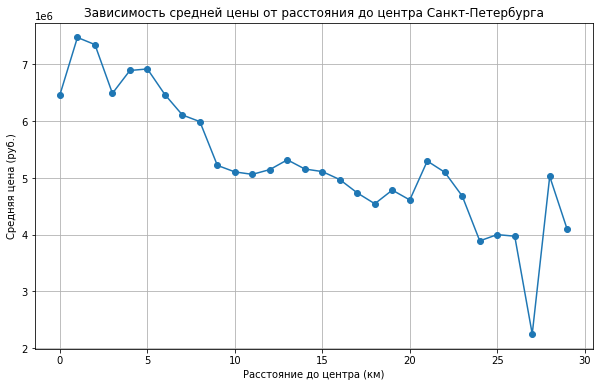

In [68]:
# Построение графика зависимости цены от удаления от центра Санкт-Петербурга
price_per_km.plot(kind='line', figsize=(10, 6), marker='o', 
                  title='Зависимость средней цены от расстояния до центра Санкт-Петербурга',
                  xlabel='Расстояние до центра (км)', ylabel='Средняя цена (руб.)', 
                  grid=True)
plt.show()

**Вывод**

Была исследована зависимость цен на жилье в Санкт-Петербурге от расстояния до центра города. Для этого были отобраны квартиры только из Санкт-Петербурга, затем рассчитана средняя цена для каждого километра удаленности от центра на основе группировки данных. Полученная зависимость визуализирована с помощью графика. Результаты показали, что цена на квартиры снижается по мере увеличения расстояния от центра.

### Напишите общий вывод

В ходе проекта был проведён всесторонний анализ данных о недвижимости. На этапе предобработки были исправлены пропуски и дубликаты, стандартизированы названия населённых пунктов, а также добавлены новые столбцы для детального анализа, такие как стоимость квадратного метра и расстояние до центра города. Проведён исследовательский анализ, включающий изучение распределений общей площади, жилой площади, площади кухни, высоты потолков, количества комнат и этажей. Для устранения выбросов применены методы фильтрации, что позволило улучшить качество данных и повысить точность дальнейших выводов.

Основные выводы:

- Стоимость недвижимости значительно зависит от общей, жилой площади и площади кухни. Эти параметры показывают положительную корреляцию с ценой — чем больше площадь, тем выше цена объекта.
- Квартиры на первых этажах в среднем дешевле, чем на последних и других этажах.
- Время продажи объектов недвижимости сильно варьируется, однако медианное значение составило 89 дней.
- Дата размещения объявления не оказывает существенного влияния на цену — зависимости от года, месяца или дня недели не выявлено.
- Среди 10 населённых пунктов с наибольшим количеством объявлений самая высокая стоимость квадратного метра в Санкт-Петербурге, а самая низкая — в Выборге.
- В Санкт-Петербурге цена на квартиры уменьшается с увеличением расстояния до центра города.